# Rarefaction - Extrapolation

Rarefaction - Extrapolation, or Species Accumulation curves elucidate the relationship between the number of unique species and the increment in sample size (i.e., the number of observations).  These curves offer a sort of peak into the future: they show how many unique species we are expected to find if we were to continue sampling more items -- into infinity. With Copia, you can compute this relationship effortlessly using the `species_accumulation()` function. Examine the following code snippet for a practical demonstration:

In [1]:
import pandas as pd

from copia.data import to_copia_dataset
from copia.rarefaction_extrapolation import species_accumulation

df = pd.read_csv("../datasets/dum.csv", sep=';')
df.columns = 'work', 'signature'

ds = to_copia_dataset(
    df, data_type="abundance", input_type="observations", index_column="work")

accumulation = species_accumulation(ds, max_steps=1000, n_iter=100, step_size=10)
accumulation

  0%|          | 0/100 [00:00<?, ?it/s]

,est,lci,uci,interpolated
steps,,,,
1,1.000000,1.000000,1.000000,True
11,9.813107,9.491307,10.088475,True
21,17.089954,16.219956,17.845434,True
31,23.373672,21.962527,24.623940,True
41,28.958599,27.022643,30.811321,True
...,...,...,...,...
961,143.697450,105.684891,205.608881,False
971,143.848999,105.717249,206.119738,False
981,143.995227,105.747733,206.618181,False


We can visualize the species accumulation using Copia's `accumulation_curve()` function. The following code snippet demonstrates how to plot the accumulation curve:

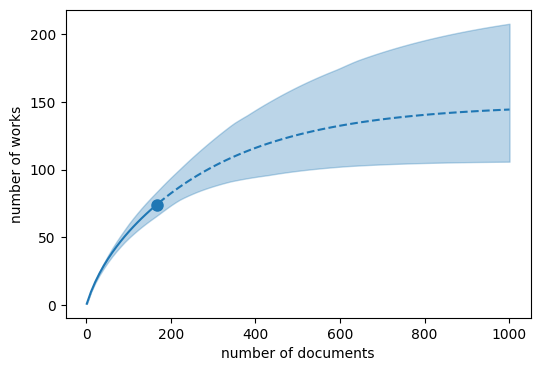

In [2]:
import matplotlib.pyplot as plt
from copia.plot import accumulation_curve

fig, ax = plt.subplots(figsize=(6, 4))

accumulation_curve(
    ds, accumulation, ax=ax, xlabel="number of documents", ylabel="number of works");

In the plotted curve, the blue dot represents the empirical species richness. To its left, the interpolated accumulation of species with increased sampling is depicted (the rarefaction part). On the right, a projection into the future is illustrated, showing the anticipated discovery of new species or works with further document sampling (the extrapolation part). Notably, the curve begins to flatten around 1000 documents, suggesting that beyond this point, no new unseen works are expected to be found according to the estimator.